In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()

features = list(data.columns)
for feature in features:
    data[feature] = le.fit_transform(data[feature])
X = np.array(data.drop('Attrition',axis=1))
Y = np.array(data["Attrition"])
scaler = StandardScaler()
X = scaler.fit_transform(X)

xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size=0.2,random_state=42)


In [18]:
class logisticRegression:
    def __init__(self, layer_dims):
        self.layer_dims = layer_dims
        self.parameters = {}
        self.L = len(self.layer_dims) - 1
        for i in range(1, self.L + 1):
            # Reduced initialization scale for better stability
            self.parameters[f'W{i}'] = np.random.randn(layer_dims[i], layer_dims[i-1]) * np.sqrt(1/layer_dims[i-1])
            self.parameters[f'B{i}'] = np.zeros((layer_dims[i], 1))
    
    def ReLU(self, Z):
        return np.maximum(0, Z)
    
    def Sigmoid(self, Z):
        # Clip values to avoid overflow
        Z = np.clip(Z, -500, 500)
        return 1/(1 + np.exp(-Z))
    
    def derevative_ReLU(self, Z):
        return np.where(Z > 0, 1, 0)
    
    def derevative_Sigmoid(self, Z):
        s = self.Sigmoid(Z)
        return s * (1 - s)
    
    def forward_propagation(self, X):
        cache = {}
        A = X.T if len(X.shape) > 1 else X.reshape(X.shape[0], -1)
        cache['A0'] = A
        for i in range(1, self.L+1):
            Z = np.dot(self.parameters[f'W{i}'], A) + self.parameters[f'B{i}']
            cache[f'Z{i}'] = Z
            A = self.Sigmoid(Z) if i == self.L else self.ReLU(Z)
            # Add small epsilon to prevent exact zeros
            A = np.clip(A, 1e-15, 1 - 1e-15)
            cache[f'A{i}'] = A
        return A, cache
    
    def computeCost(self, AL, Y):
        m = Y.shape[0]
        Y = Y.reshape(1, m)
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        AL = np.clip(AL, epsilon, 1 - epsilon)
        cost = -(1/m) * np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))
        return np.squeeze(cost)

    def back_propagation(self, cache, Y):
        gradients = {}
        m = Y.shape[0]
        Y = Y.reshape(1, m)
        AL = cache[f'A{self.L}']
        
        # Add small epsilon to prevent division by zero
        epsilon = 1e-15
        AL = np.clip(AL, epsilon, 1 - epsilon)
        
        # Calculate initial gradient more safely
        dAL = -np.divide(Y, AL) + np.divide(1 - Y, 1 - AL)
        
        for i in reversed(range(1, self.L+1)):
            Z = cache[f'Z{i}']
            A_prev = cache[f'A{i-1}']
            
            if i == self.L:
                dZ = dAL * self.derevative_Sigmoid(Z)
            else:
                dZ = dAL * self.derevative_ReLU(Z)
            
            gradients[f'dW{i}'] = (1/m) * np.dot(dZ, A_prev.T)
            gradients[f'dB{i}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            
            if i > 1:
                dAL = np.dot(self.parameters[f'W{i}'].T, dZ)
        
        return gradients
    
    def updateParameters(self, gradient, lr):
        for i in range(1, self.L+1):
            self.parameters[f'W{i}'] -= lr * gradient[f'dW{i}']
            self.parameters[f'B{i}'] -= lr * gradient[f'dB{i}']

    def train(self, X, Y, lr=0.001, epochs=1000, print_cost=True):
        costs = []
        
        for epoch in range(epochs):
            AL, cache = self.forward_propagation(X)
            cost = self.computeCost(AL, Y)
            gradients = self.back_propagation(cache, Y)
            self.updateParameters(gradient=gradients, lr=lr)
            
            if np.isnan(cost):
                print(f"Training stopped at epoch {epoch} due to NaN values")
                break
                
            if print_cost and epoch % 100 == 0:
                print(f"The cost of the model at {epoch}: {cost}")
            costs.append(cost)
        
        return costs
    
    def predict(self, X):
        AL, _ = self.forward_propagation(X)
        predictions = (AL > 0.5).astype(int)
        return predictions.T
    
    def evaluate(self, X, Y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions.flatten() == Y) * 100
        return accuracy
model = logisticRegression([X.shape[1],32,16,1])
model.train(xTest,yTest)

The cost of the model at 0: 0.819558078442946
The cost of the model at 100: 0.7584135914029148
The cost of the model at 200: 0.7086439636781903
The cost of the model at 300: 0.6668819837026405
The cost of the model at 400: 0.6312852727010992
The cost of the model at 500: 0.600252361584647
The cost of the model at 600: 0.5734011821365498
The cost of the model at 700: 0.5501428230759879
The cost of the model at 800: 0.529835079900179
The cost of the model at 900: 0.5120983534788945


[0.819558078442946,
 0.8188776283121934,
 0.8181986620105858,
 0.8175217667133936,
 0.816846209386779,
 0.8161717135726159,
 0.8154987331581383,
 0.8148272633492568,
 0.8141572967858958,
 0.8134888281286204,
 0.8128218136224753,
 0.812156074593016,
 0.8114917836492195,
 0.8108285766356462,
 0.8101665237029001,
 0.8095059446265749,
 0.8088464333006242,
 0.8081879394121295,
 0.8075309583731138,
 0.8068761903323988,
 0.8062228558614144,
 0.8055714254634059,
 0.8049220340200387,
 0.804274517435415,
 0.803627701484563,
 0.8029822155074458,
 0.8023382288092261,
 0.8016961287572512,
 0.8010558685617791,
 0.8004172205769503,
 0.799780039740339,
 0.799144045865264,
 0.7985094376804264,
 0.7978763988653438,
 0.7972450821223325,
 0.796616117421138,
 0.7959886688739364,
 0.7953628279284772,
 0.7947386599468886,
 0.7941156598094486,
 0.7934939831439809,
 0.7928734141311741,
 0.7922534897674177,
 0.7916353242676422,
 0.7910187607829519,
 0.7904037548060064,
 0.7897907574464753,
 0.789179072204921,
 

In [27]:
accuracy = model.evaluate(xTest,yTest)
print(accuracy)

86.73469387755102


The cost of the model at 0: 0.7256936909694711
The cost of the model at 100: 0.702581861267888
The cost of the model at 200: 0.6817936186081766
The cost of the model at 300: 0.6628071179810509
The cost of the model at 400: 0.6454749824462428
The cost of the model at 500: 0.6296189400974409
The cost of the model at 600: 0.6150537697114584
The cost of the model at 700: 0.6015802995526194
The cost of the model at 800: 0.5892211193298166
The cost of the model at 900: 0.5779127000350622


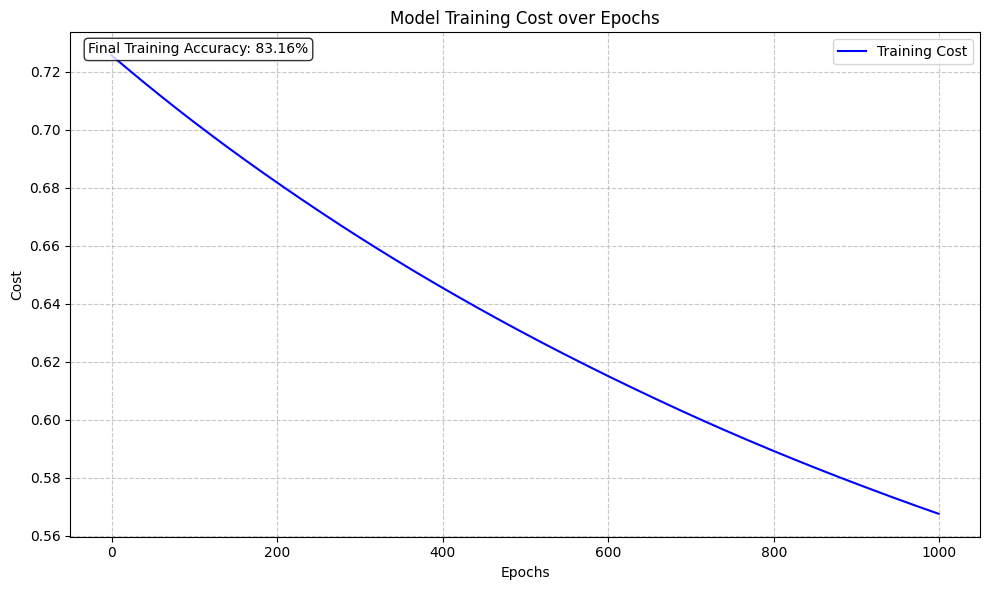

In [28]:
def train_and_visualize(X_train, y_train, layer_dims, learning_rate=0.001, epochs=1000):
    # Create and train the model
    model = logisticRegression(layer_dims)
    costs = model.train(X_train, y_train, lr=learning_rate, epochs=epochs)
    
    # Create the visualization
    plt.figure(figsize=(10, 6))
    plt.plot(costs, 'b-', label='Training Cost')
    plt.title('Model Training Cost over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    # Add final training accuracy
    train_accuracy = model.evaluate(X_train, y_train)
    plt.text(0.02, 0.98, f'Final Training Accuracy: {train_accuracy:.2f}%', 
             transform=plt.gca().transAxes, 
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return model

# Train and visualize the model
model = train_and_visualize(
    X_train=xTrain,
    y_train=yTrain,
    layer_dims=[X.shape[1], 64, 32, 16, 8, 1],
    learning_rate=0.001,
    epochs=1000
)